# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [4]:
import numpy as np
import pandas as pd

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [5]:
employee=pd.read_csv('Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [6]:
employee.groupby('Department')['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [7]:
employee.pivot_table(index='Department')

,Salary,Years
Department,,
HR,45.00,4.666667
IT,48.75,4.500000
Sales,55.00,2.500000


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [8]:
employee.pivot_table(index=['Department', 'Title'])# your answer here

# 2me methode sans pivot employee.groupby(['Department', 'Title'])['Salary'].mean()

Salary  Years
Department Title                   
HR         VP           70.0    8.0
           analyst      32.5    3.0
IT         VP           70.0    8.0
           analyst      32.5    1.5
           associate    60.0    7.0
Sales      associate    55.0    2.5

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [9]:
employee.pivot_table(index='Title') # way1 - simple

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


In [10]:
employee.pivot_table(index=["Title"], values=["Salary", "Years"], aggfunc=np.mean) # way 2

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [11]:
employee.pivot_table(index=["Department", "Title"], values=["Salary"], aggfunc=('count', 'mean'))

Salary      
                      count  mean
Department Title                 
HR         VP           1.0  70.0
           analyst      2.0  32.5
IT         VP           1.0  70.0
           analyst      2.0  32.5
           associate    1.0  60.0
Sales      associate    2.0  55.0

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [12]:
employee.pivot_table(index=["Department","Title"], values=["Salary"], aggfunc={ 'Salary': [min, max, np.std, np.median]})

Salary                       
                        max median   min       std
Department Title                                  
HR         VP          70.0   70.0  70.0       NaN
           analyst     35.0   32.5  30.0  3.535534
IT         VP          70.0   70.0  70.0       NaN
           analyst     35.0   32.5  30.0  3.535534
           associate   60.0   60.0  60.0       NaN
Sales      associate   55.0   55.0  55.0  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [13]:
employee.pivot_table(index=["Department","Title"], values=["Salary"], aggfunc={ 'Salary': [min, max, np.std, np.median]}, fill_value=0)

Salary                     
                        max median min       std
Department Title                                
HR         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
IT         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
           associate     60   60.0  60  0.000000
Sales      associate     55   55.0  55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [14]:
employee.pivot_table(index=["Department"], values=["Salary"], aggfunc=('count', 'sum')) # sum

Salary     
            count  sum
Department            
HR              3  135
IT              4  195
Sales           2  110

#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [15]:
employee.pivot_table(index=['Department', 'Title'], aggfunc={'Years': np.sum, 'Salary': np.mean})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [16]:
# your answer here--Your custom function here
        

In [17]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [18]:
fitbit=pd.read_csv('Fitbit.csv')
fitbit.head(10)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
5,13-05-2015,276,779,5.79,15,726.000,172,34,18,1094,405,47,31,457
6,14-05-2015,2687,5614,4.17,2,782.000,216,13,1,9830,381,28,12,415
7,15-05-2015,2793,8169,6.07,14,801.000,218,8,7,1092,269,34,16,306
8,16-05-2015,4061,19971,14.84,18,532.000,247,101,118,27,452,26,18,507
9,17-05-2015,3349,852,6.33,12,606.000,186,46,73,1766,269,17,11,291


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [19]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [20]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [21]:
fitbit.corr()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
Calorie burned,1.000000,0.255305,0.292790,0.130757,0.125353,0.209540,0.188256,0.197881,-0.130758,0.011485,0.041999,0.030490,0.017460
Steps,0.255305,1.000000,0.779678,0.306511,0.076906,0.393010,0.303244,0.571452,-0.160568,0.130986,0.124846,0.106591,0.133405
Distance,0.292790,0.779678,1.000000,0.382940,0.160632,0.455272,0.348113,0.759310,-0.246853,0.129442,0.130447,0.091095,0.134550
Floors,0.130757,0.306511,0.382940,1.000000,0.057812,-0.085992,0.278408,0.399503,-0.155532,0.069464,0.064587,0.043459,0.075864
Minutes Sedentary,0.125353,0.076906,0.160632,0.057812,1.000000,0.217021,0.084137,0.105963,-0.161446,0.204242,0.200589,0.178387,0.208539
Minutes Lightly Active,0.209540,0.393010,0.455272,-0.085992,0.217021,1.000000,0.014288,-0.034425,-0.219892,0.105048,0.096107,0.087150,0.105406
Minutes Fairly Active,0.188256,0.303244,0.348113,0.278408,0.084137,0.014288,1.000000,0.337839,-0.204562,0.114950,0.104303,0.100498,0.123034
Minutes Very Active,0.197881,0.571452,0.759310,0.399503,0.105963,-0.034425,0.337839,1.000000,-0.187309,0.108018,0.116559,0.099859,0.115641
Activity Calories,-0.130758,-0.160568,-0.246853,-0.155532,-0.161446,-0.219892,-0.204562,-0.187309,1.000000,-0.005804,0.010859,0.022757,-0.004992
MinutesOfSleep,0.011485,0.130986,0.129442,0.069464,0.204242,0.105048,0.114950,0.108018,-0.005804,1.000000,0.779595,0.780512,0.997184


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [22]:
df=fitbit[['Minutes Very Active', 'Steps']]

In [23]:
df.corr()

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


In [24]:
df.corr(method='spearman')

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.632145
Steps,0.632145,1.000000


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

In [25]:
import matplotlib.pyplot as plt

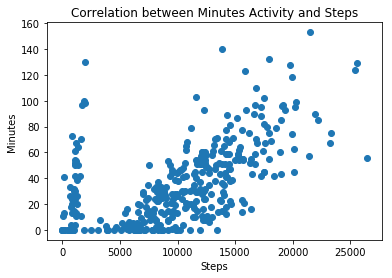

In [28]:
plt.scatter(x=df['Steps'], y=df['Minutes Very Active'])
#plt.figure(figsize=(20, 20), dpi=80)
plt.xlabel('Steps')
plt.ylabel('Minutes')
plt.title('Correlation between Minutes Activity and Steps')
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [19]:
# your comment here

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [92]:
sedentary=fitbit[['Minutes Sedentary', 'Steps']]

In [93]:
sedentary.corr()

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [21]:
# your answer here

In [22]:
# Your comment here

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [96]:
sleep=fitbit[['MinutesOfSleep', 'Steps']]
sleep.corr()

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [24]:
import numpy as np
x1 = np.arange(0,10,1)
x2 = np.linspace(0,5,10)
plt.plot(x1, x1, label='linear')
#plt.plot(x1, x2**2, label='quadratic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Linear vs Non Linear Plots")
plt.legend()
plt.show()

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [101]:
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
cor_fit=fitbit(columns=column)

TypeError: 'DataFrame' object is not callable

In [26]:
#Print cor_fit

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [27]:
# your answer here

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [29]:
time_grades=pd.read_csv('Time_Grades.csv')

In [31]:
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0BD031EB8>,
      dtype=object)

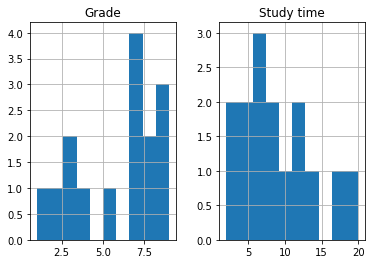

In [33]:
time_grades.hist()

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [34]:
time_grades.corr(method='pearson')

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [36]:
time_grades.corr(method='spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

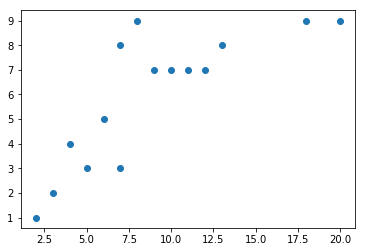

In [38]:
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])

In [34]:
#your comment here

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [35]:
#your comment here